In [ ]:
#IMDB Movie Review Classification into positive and Negative Using LSTM

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [2]:
# prompt: load data

# Load the IMDB dataset
vocab_size=10000
max_length = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)


17464789/17464789 [==============================] - 0s 0us/step


In [3]:
# prompt: print few records in x train

print(x_train[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
# prompt: convert numeric codes back to words

# Create a dictionary that maps words to their indices
word_index = imdb.get_word_index()

# Reverse the word index dictionary
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Convert the first review in X_train back to words
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])

print(decoded_review)




1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

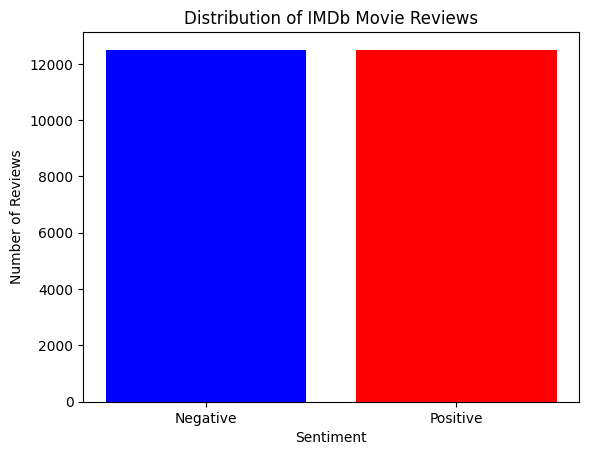

In [5]:
import matplotlib.pyplot as plt

# Count positive and negative reviews
unique, counts = np.unique(y_train, return_counts=True)
review_distribution = dict(zip(unique, counts))
# Visualize the distribution
plt.bar(review_distribution.keys(), review_distribution.values(), color=['blue', 'red'])
plt.title('Distribution of IMDb Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


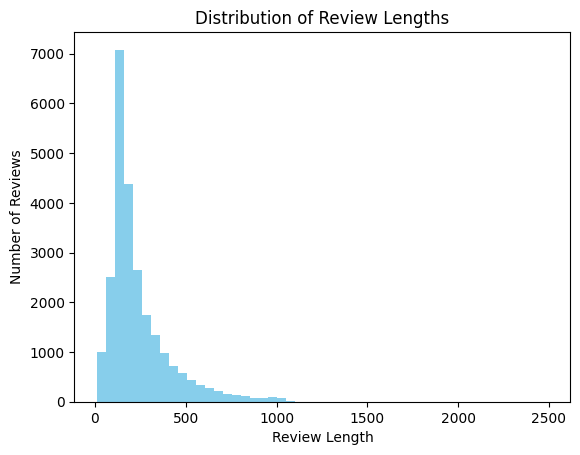

In [6]:
# prompt: check review length

# Calculate the length of each review
review_lengths = [len(review) for review in x_train]

# Plot the distribution of review lengths
plt.hist(review_lengths,bins=50,color="skyblue")
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()


In [7]:
# prompt: padding sequences

# Pad the sequences to a maximum length of 500 words
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)


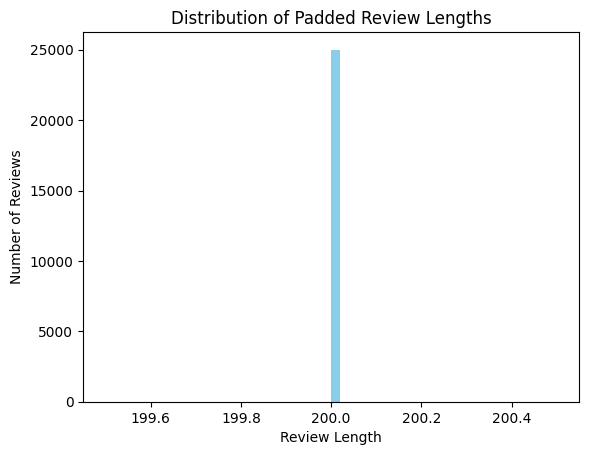

In [8]:
# prompt: show plot of padded

# Plot the distribution of padded review lengths
plt.hist(np.array([len(review) for review in x_train]),bins=50,color="skyblue")
plt.title('Distribution of Padded Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()


In [9]:
# prompt: define model
embedding_dim=128
# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim= embedding_dim, input_length=max_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1411713 (5.39 MB)
Trainable params: 1411713 (5.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# prompt: model training, accuracy and loss evaluation

# Train the model
epochs = 5
batch_size = 128

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size)
validation_data=(x_test, y_test)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/5
196/196 [==============================] - 315s 2s/step - loss: 0.4307 - accuracy: 0.7973
Epoch 2/5
196/196 [==============================] - 289s 1s/step - loss: 0.2500 - accuracy: 0.9026
Epoch 3/5
196/196 [==============================] - 289s 1s/step - loss: 0.1874 - accuracy: 0.9303
Epoch 4/5
196/196 [==============================] - 291s 1s/step - loss: 0.1497 - accuracy: 0.9444
Epoch 5/5
782/782 [==============================] - 62s 79ms/step - loss: 0.4368 - accuracy: 0.8584
Test Loss: 0.43681731820106506
Test Accuracy: 0.8584399819374084


In [13]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score, classification_report

# Predict probability scores for the test set
y_pred_probs = model.predict(x_test)

# Convert probability scores to binary labels
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate classification report
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)



782/782 [==============================] - 72s 91ms/step
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     12500
           1       0.88      0.83      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

Confusion Matrix:
[[11088  1412]
 [ 2127 10373]]


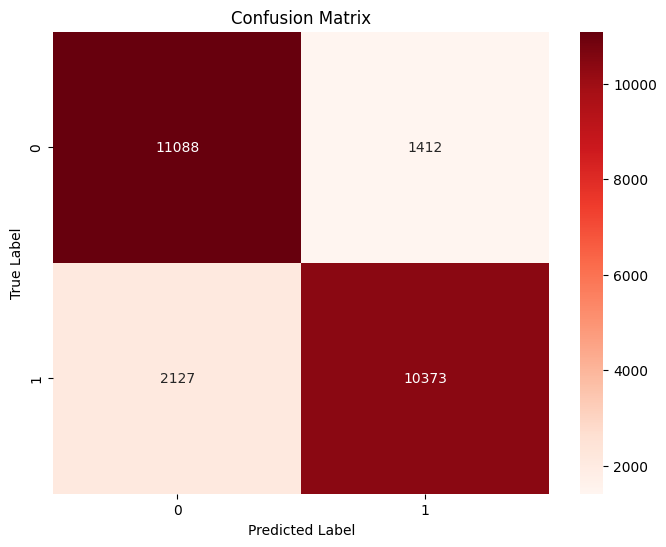

In [16]:
# prompt: plot confusion matrix
import seaborn as sns
plt.figure(figsize=(8,6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
# Plot the confusion matrix

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
